## Income Classification Problem 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, StandardScaler 


%matplotlib inline

## Data Description and Definition

In [2]:
df = pd.read_csv("C:/Users/nikhi/income_classifier/dataset/salary.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Understanding the Basic Structure of the Data

In [3]:
df.shape

(32561, 15)

> There are 15 Features and 32561 datapoints 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Summary of the data spread in case of the Numerical Features 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
df.salary.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

__Dependent Variable need to be transfomered in order to improve the accuracy of the model__

In [7]:
df_salary = pd.get_dummies(df['salary'], drop_first=True)
df_salary

,>50K
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [8]:
df = df.drop('salary', axis=1)
df['salary'] = df_salary
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## Correlation Report 

__Here we are computing the pairwise correlation value for all the columns__

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_4816\2001914525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
age,1.00,-0.08,0.04,0.08,0.06,0.07,0.23
fnlwgt,-0.08,1.00,-0.04,0.00,-0.01,-0.02,-0.01
education-num,0.04,-0.04,1.00,0.12,0.08,0.15,0.34
capital-gain,0.08,0.00,0.12,1.00,-0.03,0.08,0.22
capital-loss,0.06,-0.01,0.08,-0.03,1.00,0.05,0.15
hours-per-week,0.07,-0.02,0.15,0.08,0.05,1.00,0.23
salary,0.23,-0.01,0.34,0.22,0.15,0.23,1.00


Insights: 

    - "fnlwgt" is negatively correlated with all the other features which indicates it has no use.
    
    -  We are seeing Positive Correlation between the salary and ['Age','education-num','hours-per-week']

In [10]:
cat_columns = [col for col in df.columns if df[col].dtype == 'O']
num_columns = [col for col in df.columns if col not in cat_columns]

In [11]:
for col in cat_columns:
    df[col] = df[col].apply(lambda x: x.strip())
    if df[col].nunique() > 1:
        print(f"Unique Values for {col} are: {df[col].unique()}  \n")
    else:
        pass


Unique Values for workclass are: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']  

Unique Values for education are: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']  

Unique Values for marital-status are: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']  

Unique Values for occupation are: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']  

Unique Values for relationship are: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']  

Unique Values for race are: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' '

In [12]:
df.replace({'?': np.NAN}, inplace=True)
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [14]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

## Null Value Analysis 

_Based on the analysis, the missing values are treated; Missing Values bring no information to the model, Discard them or Impute them based the missing values ratio_

__Output: ['workclass','occupation', 'native-county']__ Missing Values found were negligible. Therefore we can drop them. Alternatively since these features are categorical in nature we can simply use mode imputation and remove the null values.


In [15]:
(df.isnull().sum()/df.shape[0])*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
salary            0.000000
dtype: float64

In [16]:
final_df = df.dropna()
final_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [17]:
final_df.shape

(30162, 15)

_The ratio of the missing values in the dataset is negligible. Therefore we can drop these, Though we need a function for this process for checking other conditions and treating the missing values accordingly._

## Exploratory Data Analysis 

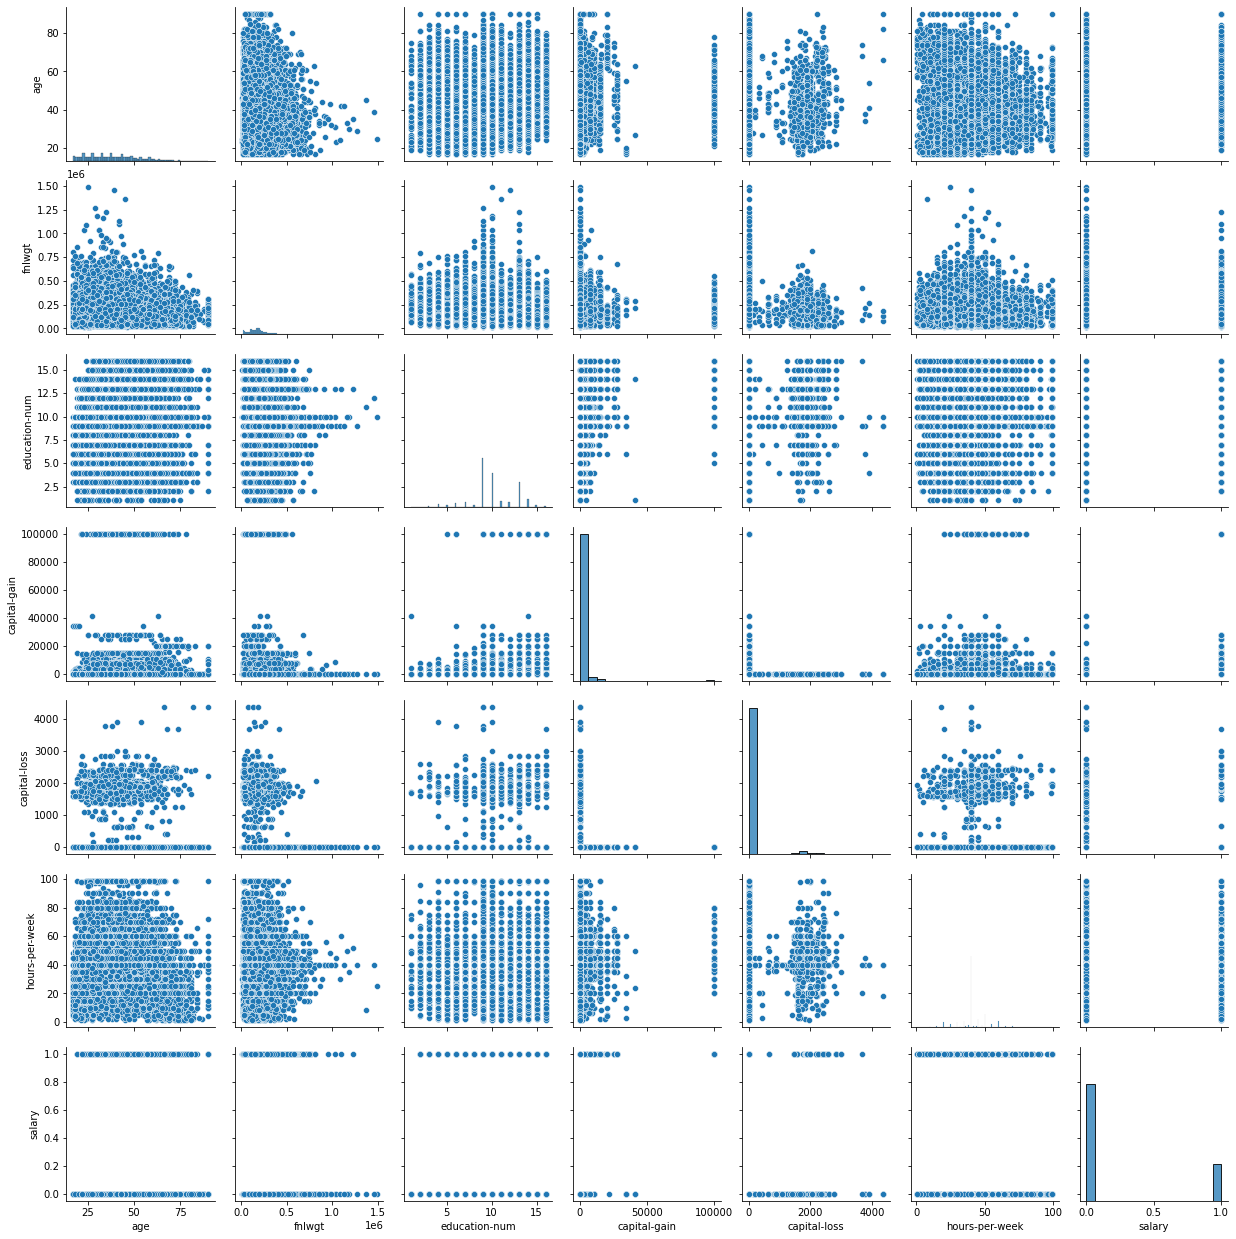

In [22]:
sns.pairplot(df)

## Univariant Analysis 

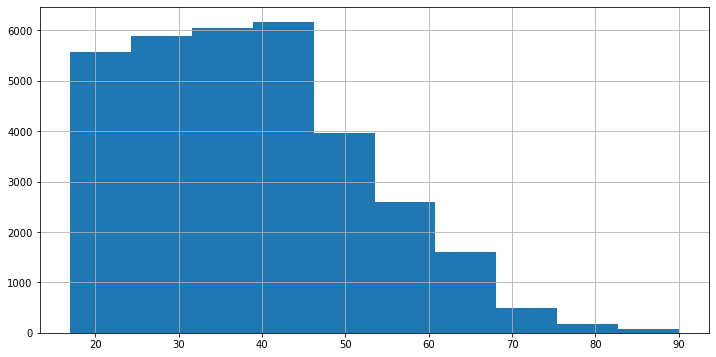

In [24]:
df['age'].hist(figsize=(12,6))
plt.show()

Insigths - _Here the age demographics in spread between the ages 17 - 90. Also the data looks slightly right skewed._

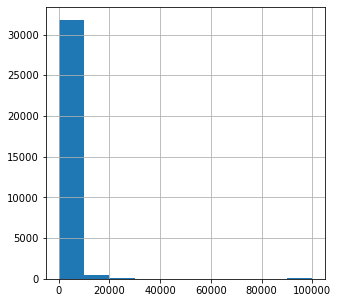

In [25]:
df['capital-gain'].hist(figsize=(5,5))
plt.show()

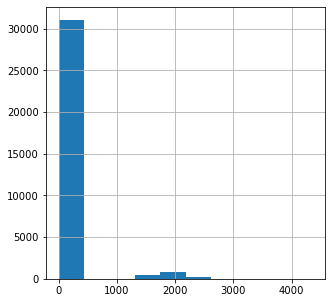

In [26]:
df['capital-loss'].hist(figsize=(5,5))
plt.show()

Insigths - _In both the plots it is clear that most of the values are centered around 0_

<AxesSubplot:>

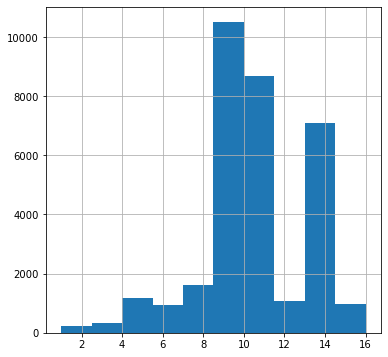

In [29]:
df['education-num'].hist(figsize=(6,6))

_The datapoints for Number of years of education varies between 1-16, where mojority of the individuals have 9-11 years of education._